# Exercise 3.2: Using Data to Improve MLB Attendance

Author: Jordan, Andrew

Date: 06/22/2022

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
%pwd

'C:\\Users\\Andrew\\Documents\\Grad School\\DSC 630 - Predictive Analytics\\Assignments'

In [92]:
#Load data
dodgers_df = pd.read_csv("data/dodgers-2022.csv")
dodgers_df.head(10)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
5,APR,15,38359,Sunday,Padres,65,Clear,Day,NO,NO,NO,NO
6,APR,23,26376,Monday,Braves,60,Cloudy,Night,NO,NO,NO,NO
7,APR,24,44014,Tuesday,Braves,63,Cloudy,Night,NO,NO,NO,NO
8,APR,25,26345,Wednesday,Braves,64,Cloudy,Night,NO,NO,NO,NO
9,APR,27,44807,Friday,Nationals,66,Clear,Night,NO,NO,YES,NO


In [93]:
#Describe data
dodgers_df.astype('object').describe()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81,81,81,81
unique,7,31,80,7,17,32,2,2,2,2,2,2
top,MAY,30,56000,Tuesday,Giants,70,Clear,Night,NO,NO,NO,NO
freq,18,5,2,13,9,9,62,66,79,78,67,70


The initial examination above shows that most Dodgers games were-for their respective categories-played in May, on a Tuesday, and against the Giants. 

In [94]:
# Convert NO/YES to 0/1
dodgers_df['cap'] = dodgers_df['cap'].replace({'NO': 0, 'YES': 1}).astype(int)
dodgers_df['shirt'] = dodgers_df['shirt'].replace({'NO': 0, 'YES': 1}).astype(int)
dodgers_df['fireworks'] = dodgers_df['fireworks'].replace({'NO': 0, 'YES': 1}).astype(int)
dodgers_df['bobblehead'] = dodgers_df['bobblehead'].replace({'NO': 0, 'YES': 1}).astype(int)
dodgers_df['day_night'] = dodgers_df['day_night'].replace({'Day': 0, 'Night': 1}).astype(int)
dodgers_df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,0,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,1,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,1,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,1,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,1,0,0,0,0


In [95]:
#Correlation check
dodgers_df.corr()['attend']

day           0.027093
attend        1.000000
temp          0.098951
day_night    -0.043544
cap          -0.055002
shirt         0.133269
fireworks     0.002094
bobblehead    0.581895
Name: attend, dtype: float64

The correlation check shows very little indication of a relationship between attendance and the other variables, with the exception of the bobblehead promotion. Though not a perfect match, it has the highest indication of a relationship with a positive correlation of .58

<AxesSubplot:title={'center':'attend'}, xlabel='[day_of_week]'>

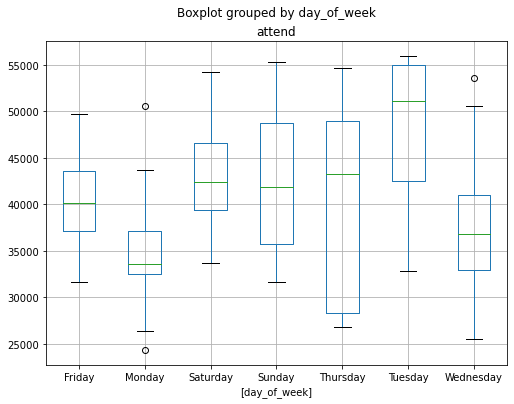

In [96]:
# Create Boxplot
dodgers_df.boxplot('attend', by=['day_of_week'], figsize = (8,6))

This boxplot shows that Tuesdays are far and away the most attended games, while Mondays are the least attended.

C:\Users\Andrew\AppData\Local\Temp/ipykernel_20824/891953531.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dodgers_df.groupby('day_of_week')['cap','shirt','fireworks','bobblehead'].sum().plot.bar(figsize = (8,8))


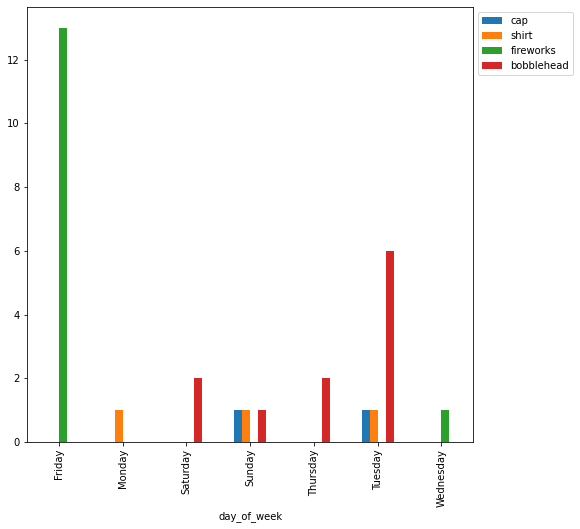

In [97]:
dodgers_df.groupby('day_of_week')['cap','shirt','fireworks','bobblehead'].sum().plot.bar(figsize = (8,8))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.show()

As the above graph shows, the Dodgers have fireworks every Friday and on one Wednesday (the 4th of July), and most bobblehead promotions occur on Tuesdays. While not enough on their own to warrant a specific recommendation, in conjunction with the results from the above boxplot, further examination of the impact bobblehead promotions have on attendance is warranted. 

In [98]:
#Create regression model
attend, bobblehead = dodgers_df.bobblehead, dodgers_df.attend
attend_train, attend_test, bobblehead_train, bobblehead_test = train_test_split(attend, bobblehead, random_state = 0)
dodgers_dummy = DummyRegressor(strategy='mean')
dodgers_dummy.fit(attend_train.values.reshape(-1,1), bobblehead_train.values.reshape(-1,1))

DummyRegressor()

In [99]:
#Check R2 score
dodgers_dummy.score(attend_test,bobblehead_test)

-0.009037085686444124

In [100]:
#Train model
from sklearn.linear_model import LinearRegression
dodgers_ols = LinearRegression()
dodgers_ols.fit(attend_train.values.reshape(-1,1), bobblehead_train.values.reshape(-1,1))

LinearRegression()

In [101]:
#Check R2 score
dodgers_ols.score(attend_test.values.reshape(-1,1), bobblehead_test.values.reshape(-1,1))

0.2700528434141467

## Recommendation
When considering what variables to examine for making a recommendation, opponent, temperature, weather, month, day, and time of day can not be considered. These variables are not able to be considered in recommendations, as the month, day, time of day, and opponent as the Dodgers have no control over their schedule. Additionally, the Dodgers can not-that we yet know of-control the weather and a domed baseball stadium would not only be an oddity but financially impractical, thus the temperature and weather can not be considered for recommendations. If at a future time the Dodgers' front office is able to control the weather, I will revisit my variable examination. 

As the Dodgers do have control over their promotions, identifying the one most impactful on attendance is of the uptmost importance. The initial correlation check, in conjunction with the above plots, indicates that the bobblehead promotion has the greatest impact on attendance. Even with a relatively low R2 score of .27, from the information available the best recommendation I can make to the Dodgers is to increase their bobblehead promotion games. Ideally the dodgers would replace cap promotion games with bobblehead promotion games as the cap promotion games appear to have the least success, and in fact could have a negative impact on attendance, however to say this with any certainty there would need to be more testing performed. With some certainty though, I can recommend the Dodgers increase the number of their bobblehead promotion games, perhaps spread across days of the week with lower average attendance rating than the most popular day of Tuesday.